<a href="https://colab.research.google.com/github/entangelk/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
# 샘플 데이터 생성 (이상치 포함)
df_data = pd.DataFrame({
    'Age_outlier': np.random.randint(20, 50, size=95).tolist() + [9, 75, 80, 85, 90]  # 대부분 20세에서 50세 사이, 몇몇 이상치 포함
    ,'Age_20_50': np.random.randint(20, 50, size=100).tolist()  # 대부분 20세에서 50세 사이

})


## read excel file with sheets

In [4]:
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name=None)

In [5]:
len(df_OWG)

3

In [6]:
sheets_list = []
for i,df in df_OWG.items():
  sheets_list.append(df)
  print(f'{i} {type(df)}')

2월 <class 'pandas.core.frame.DataFrame'>
1월 <class 'pandas.core.frame.DataFrame'>
12월 <class 'pandas.core.frame.DataFrame'>


In [7]:
sheets_list[2].columns
# 이름의 columns의 이름을 확인 후 name으로 변환작업

Index(['      ', '12월 29일', '12월 28일', '12월 27일', '12월 26일', '12월 22일',
       '12월 21일', '12월 20일', '12월 19일', '12월 18일', '12월 15일', '12월 14일',
       '12월 13일', '12월 12일', '12월 11일'],
      dtype='object')

In [8]:
sheets_list[0].rename(columns={'            ': 'name'}, inplace=True)

In [9]:
sheets_list[1].rename(columns={'            ': 'name'}, inplace=True)

In [10]:
sheets_list[2].rename(columns={'      ': 'name'}, inplace=True)

In [11]:
sheets_list[0]

,name,Unnamed: 1,2024-02-15 00:00:00,2024-02-14 00:00:00,2024-02-13 00:00:00,2024-02-07 00:00:00,2024-02-06 00:00:00,2024-02-05 00:00:00,2024-02-02 00:00:00,2024-02-01 00:00:00
0,문석천,NaN,비지도학습\n머신러닝 학습의 일종으로 정답이 존재하지 않을 때 사용하는 방식이다.\...,랜덤포레스트\n지도 학습 알고리즘으로 의사결정트리의 집합이다.\n목적은 True나 ...,지도학습 (supervisor learning)\n머신러닝의 일종으로 컴퓨터에 모델...,귀무가설\nEDA를 통해 얻은 인사이트를 기반으로 CDA를 통해서 규명하고자 하는 ...,pearsonr\n다변수 검증 시 변수가 연속형과 연속형이고 정규분포일 경우 사용하...,insight\n인사이트를 통해 얻은 데이터를 기반으로 분석하여 얻는 과정으로 데이...,EDA(탐색 데이터 분석)\n얻은 데이터를 토대로 데이터탐색을 통한 가설을 수립하는...,boolean indexing\n데이터 프레임 내에서 컬럼에 특정 condition...
1,김유진,NaN,특성공학(feature engineering)\n원시 데이터로부터 유용한 특성을 추...,선형회귀(linear Regression)\n종속 변수 y와 한 개 이상의 독립변수...,"scikit-learn(사이킷런), sklearn\n파이썬을 기반으로 작동하는 오픈...",NaN,CDA 확증 데이터 분석(Confirmatory Data Analysis)\n규명하...,cut()\n데이터를 구간 길이에 따라 나누는 함수로 데이터를 구간별로 쪼개어 나누...,결측치(missing value)\n수집된 dataset 중 관측되지 않은 특정 확...,datetime\n날짜와 시간을 처리하는 다양한 기능을 제공하는 파이썬 라이브러리로...
2,노주현,NaN,scaling\n수치형 데이터 변수들의 범위를 조정하는 과정입니다.\n데이터를 일정...,선형 회귀\n종속 변수와 독립 변수들 간의 관계를 파악하는데 사용하는 통계적인 방법...,군집화(Clustering)\n유사한 특성을 가진 데이터들끼리 그룹으로 나누는 작업...,anderson test \n5000개 넘는 record를 가진 연속형 데이터의 정...,"확증 데이터 분석\n규명하고자 하는 바를 가설로 수립하여, 해당 가설이 참인지 거짓...",concat \n여러 개의 데이터프레임이나 시리즈를 하나의 구조로 연결할 때 사용하...,"데이터 전처리\n분석을 하기 전에 데이터를 정리하고, 결측치와 이상값을 처리하는 과...",boxplot\n수치형 데이터의 분포와 이상값을 시각화하는 그래프입니다. \n4분위...
3,김하늘,NaN,NaN,피클 모듈\n파이썬 객체를 저장하는데 사용하는 모듈로 작업 중인 파이썬 객체를 저장...,지도 학습\n문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종으로 예측과 분류...,"확증 데이터 분석(CDA)\n규명하고자 하는 바를 가설로 수립한 다음, 해당 가설의...",Anderson-normality Test\n연속형 데이터의 정규분포 여부를 확인하...,귀무가설\n기각을 목적으로 수립하는 가설로 p-value가 0.05 이상일 때 귀무...,NaN,jointplot\n산점도와 히스토그램을 결합한 그래프로 데이터의 분포와 변수 간의...
4,박요한,NaN,넓이 우선 탐색\nBFS Breadth-First Search\n\n루트 노드에서 ...,서브쿼리\n\n쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연...,Logistic Regression\n\n범주형 종속 변수의 결과를 예측하기 위해 ...,이분탐색\n\n리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나...,"정규표현식\n\n프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자...",Generator\n\n순서가 있는 iterator를 생성해주는 기능으로 yield...,탐욕 알고리즘\n\n양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 ...,NaN
5,오지수,regular expression,Encoding\n범주형 데이터를 숫자형 데이터로 변환하는 과정을 말한다. 이 과정...,"강화학습(reinforcement learning)\n문제와 정답을 알려주지 않고,...",데이터 전처리\n결측치나 이상치를 분석에 적합한 형태로 가공하고 정제하는 과정을 말...,PDA(Predictive Data Analysis)\n데이터 간 관계를 학습한 것...,기대빈도수(expected frequencies)\n어떤 사건이 일어날 것으로 예상...,상관계수(correlation coefficient)\n두 연속형 변수간의 상관관계...,NaN,산점도(scatter plot)\n2개의 연속형 변수를 이용해 점을 찍어 만든 통계...
6,김명준,자연어 처리\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\n컴퓨터를 ...,지도학습\n컴퓨터에게 문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종이다.\...,머신러닝\n인간의 학습 능력과 같은 기능을 컴퓨터에서 실현하고자 하는 기술 및 기법...,귀무가설\n차이가 없거나 의미있는 차이가 없는 경우의 가설이다.\n실험이나 연구를 ...,대립가설\n새로운 결과나 주장을 '참'이라는 걸 입증하기위한 가설이다.\n확률적으로...,p-value\n확률을 측정한것이다. 0.05 이하면 통계적으로 유의하다고 판단한다...,seaborn\n그래프를 매우 쉽게 표현할 수 있도록 돕는 시각화 라이브러리이다.\...,pandas boxplot\n데이터의 통계적의미를 표현하기위해 주로 사용한다.\n데...,Series\n1열로만 이루어진 자료구조이다.(index + value)\n각 셀에...
7,공명윤,NaN,NaN,NaN,NaN,PDA(Predictive Data Analysis)\n데이터 간 관계를 수치화해서...,확증 데이터 분석(Confirmatory Data Analysis)\n규명하고자 하...,탐색 데이터 분석(Exploratory Data Analysis)\n- 데이터 증상...,DDA(묘사 데이터 분석\n통계적인 수치 데이터나 데이터의 구조 등을 분석하는 방법...,NaN
8,한동철,NaN,"데이터스케일링\n머신러닝을 위한 데이터셋을 정제할때, 특성별로 데이터\n스케일이 다...",딥러닝\n컴퓨터가 인간처럼 판단하고 학습할 수 있도록 하고 \n이를 통해 사물이나 ...,"머신러닝\n머신 러닝 또는 기계 학습은 컴퓨터 과학 중 인공지능의\n 한 분야로, ...",pda\n데이터에 내재된 패턴을 분석하여 아직 수행되지\n않을 일의 결과를 예측하...,상관계수\n2개의 연속형 변수 간의 연관성에 대한 \n측도이고 변수간의 분산상황이...,Kaggle\n전 세계 데이터 사이언티스트들이 데이터를 분석할 수\n 있도록 대회를...,Seaborn\n시본은 Mapplotib 를 기반으로 발전된 라이브러리로써 \n원하...,"PANDAS loc\n판다스에서 데이터프레임을 특정 행 , 열 을 기준으로 \n나누..."
9,조유경,NaN,NaN,Supervised Learning 지도 학습\n머신러닝을 학습시키는 방식 중 하나...,Linear Regression 선형회귀분석\n데이터의 경향성을 가장 잘 설명하는 ...,p-value\n관찰된 데이터 이상의 극단적인 결과를 얻을 확률을 의미한다. \np...,대립가설\n귀무가설에 대조되는 가설로 특정한 관계나 차이가 존재하다는 것을 주장하는...,cut()\n데이터를 구간 길이에 따라 나누는 함수이다. \n연속형 데이터를 범주형...,"EDA(탐색 데이터 분석, Exploratory Data Analysis)\n데이터...",query\ndataframe에서 data를 특정조건에 따라 필터링할때 사용되는 메...


In [12]:
sheets_list[0].query('name == "박요한"')

,name,Unnamed: 1,2024-02-15 00:00:00,2024-02-14 00:00:00,2024-02-13 00:00:00,2024-02-07 00:00:00,2024-02-06 00:00:00,2024-02-05 00:00:00,2024-02-02 00:00:00,2024-02-01 00:00:00
4,박요한,NaN,넓이 우선 탐색\nBFS Breadth-First Search\n\n루트 노드에서 ...,서브쿼리\n\n쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연...,Logistic Regression\n\n범주형 종속 변수의 결과를 예측하기 위해 ...,이분탐색\n\n리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나...,"정규표현식\n\n프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자...",Generator\n\n순서가 있는 iterator를 생성해주는 기능으로 yield...,탐욕 알고리즘\n\n양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 ...,NaN


In [13]:
sheets_list[0].query('name == "박요한"').values.tolist()

[['박요한',
  nan,
  '넓이 우선 탐색\nBFS Breadth-First Search\n\n루트 노드에서 시작해 인접한 노드를 먼저 탐색하는 방법으로 주로 두 노드 사이의 최적해를 찾고 싶을 때 사용한다.\n큐(선입선출)를 사용하여 구현하는것이 일반적이며 DFS보다 좀더 복잡하지만 검색 속도는 빠르다.\n',
  '서브쿼리\n\n쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연결할 경우 외부쿼리에서 직접 엑세스 할 수 없는 테이블을 연결할 때 사용된다.\n',
  'Logistic Regression\n\n범주형 종속 변수의 결과를 예측하기 위해 사용되는 방법으로 주로 바이너리한 변수 예측분석에 사용되어 어떤 범주에 속할 확률을 통해 분류하는 기법이다. \n정규분포가 아닌 이항분포를 분석/예측하기 위해 사용한다.\n',
  '이분탐색\n\n리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나누어 해당하는 구간의 중앙값을 반복적으로 비교/탐색하는 방법으로, item 갯수가 많은 리스트에서 탐색 시간복잡도를 줄이기 위해 사용한다.\n',
  '정규표현식\n\n프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자열을 표현하고 처리하는데 사용하여 문자열을 유연하고 효과적으로 처리하기 위한 기능이다.\n',
  'Generator\n\n순서가 있는 iterator를 생성해주는 기능으로 yield키워드를 사용해 생성하며 호출할때마다 다음 값을 return해주는 기능이다. 내부 변수에 의해 값이 설정되어 메모리 부분을 절약하면서 무한한 순서가 있는 객체를 표현할 때 사용된다.\n',
  '탐욕 알고리즘\n\n양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 내에서 빠른 해답결론을 도출하기 위해 사용되는 알고리즘으로 당장 직면하는 문제에 최상의 답을 선택하면서 해답을 결론해가는 방식이다.\n\n',
  nan]]

In [14]:
long_text = ''
for i in range(len(sheets_list)):
  my_df = sheets_list[i].query('name == "박요한"')
  my_df = my_df.drop(columns='name')
  for j in my_df.values.tolist():
    long_text += ' '.join(map(str,j))
long_text

"nan 넓이 우선 탐색\nBFS Breadth-First Search\n\n루트 노드에서 시작해 인접한 노드를 먼저 탐색하는 방법으로 주로 두 노드 사이의 최적해를 찾고 싶을 때 사용한다.\n큐(선입선출)를 사용하여 구현하는것이 일반적이며 DFS보다 좀더 복잡하지만 검색 속도는 빠르다.\n 서브쿼리\n\n쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연결할 경우 외부쿼리에서 직접 엑세스 할 수 없는 테이블을 연결할 때 사용된다.\n Logistic Regression\n\n범주형 종속 변수의 결과를 예측하기 위해 사용되는 방법으로 주로 바이너리한 변수 예측분석에 사용되어 어떤 범주에 속할 확률을 통해 분류하는 기법이다. \n정규분포가 아닌 이항분포를 분석/예측하기 위해 사용한다.\n 이분탐색\n\n리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나누어 해당하는 구간의 중앙값을 반복적으로 비교/탐색하는 방법으로, item 갯수가 많은 리스트에서 탐색 시간복잡도를 줄이기 위해 사용한다.\n 정규표현식\n\n프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자열을 표현하고 처리하는데 사용하여 문자열을 유연하고 효과적으로 처리하기 위한 기능이다.\n Generator\n\n순서가 있는 iterator를 생성해주는 기능으로 yield키워드를 사용해 생성하며 호출할때마다 다음 값을 return해주는 기능이다. 내부 변수에 의해 값이 설정되어 메모리 부분을 절약하면서 무한한 순서가 있는 객체를 표현할 때 사용된다.\n 탐욕 알고리즘\n\n양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 내에서 빠른 해답결론을 도출하기 위해 사용되는 알고리즘으로 당장 직면하는 문제에 최상의 답을 선택하면서 해답을 결론해가는 방식이다.\n\n nancomprehension\n\n메모리가 충분한 경우 가독성과 간결성 그리고 신속성을 위해서 사용되며 list, set, dic에서 for와 if를 사용하여 구성하는 요소를 한줄로 표

In [15]:
long_text = long_text.replace('nan','')
long_text = long_text.replace('\n',' ')
long_text

" 넓이 우선 탐색 BFS Breadth-First Search  루트 노드에서 시작해 인접한 노드를 먼저 탐색하는 방법으로 주로 두 노드 사이의 최적해를 찾고 싶을 때 사용한다. 큐(선입선출)를 사용하여 구현하는것이 일반적이며 DFS보다 좀더 복잡하지만 검색 속도는 빠르다.  서브쿼리  쿼리 내부에 중첩된 쿼리문으로 쿼리 내에서 다차적 분류를 시행하여 연결할 경우 외부쿼리에서 직접 엑세스 할 수 없는 테이블을 연결할 때 사용된다.  Logistic Regression  범주형 종속 변수의 결과를 예측하기 위해 사용되는 방법으로 주로 바이너리한 변수 예측분석에 사용되어 어떤 범주에 속할 확률을 통해 분류하는 기법이다.  정규분포가 아닌 이항분포를 분석/예측하기 위해 사용한다.  이분탐색  리스트 탐색 알고리즘 중 하나로 중앙값을 준으로 low high를 나누어 해당하는 구간의 중앙값을 반복적으로 비교/탐색하는 방법으로, item 갯수가 많은 리스트에서 탐색 시간복잡도를 줄이기 위해 사용한다.  정규표현식  프로그래밍 내에서 사용하는 형식 언어로써, 특정한 패턴을 가진 문자열을 표현하고 처리하는데 사용하여 문자열을 유연하고 효과적으로 처리하기 위한 기능이다.  Generator  순서가 있는 iterator를 생성해주는 기능으로 yield키워드를 사용해 생성하며 호출할때마다 다음 값을 return해주는 기능이다. 내부 변수에 의해 값이 설정되어 메모리 부분을 절약하면서 무한한 순서가 있는 객체를 표현할 때 사용된다.  탐욕 알고리즘  양자 컴퓨터의 병렬적 구조가 아닌 현재의 직렬적 컴퓨터 시스템 내에서 빠른 해답결론을 도출하기 위해 사용되는 알고리즘으로 당장 직면하는 문제에 최상의 답을 선택하면서 해답을 결론해가는 방식이다.   comprehension  메모리가 충분한 경우 가독성과 간결성 그리고 신속성을 위해서 사용되며 list, set, dic에서 for와 if를 사용하여 구성하는 요소를 한줄로 표현하는 방식  data preprocessing  데이터 분

In [16]:
import re
patterns = '(에서의 |에서 |하면서 |해가는 |하는데 |이다 |과 |를 |되며 |되어 |하여 |한다 |다양한 |으로 |되고 |에 |이 |은 |\.|한 |되는 |하는 |의 |을 |가 |하기 )' # 너무많다... 포기
text_regex = re.sub(pattern=patterns,repl=' ',string=long_text)
text_regex

" 넓 우선 탐색 BFS Breadth-First Search  루트 노드 시작해 인접 노드 먼저 탐색 방법 주로 두 노드 사이 최적해 찾고 싶 때 사용한다  큐(선입선출) 사용 구현하는것 일반적이며 DFS보다 좀더 복잡하지만 검색 속도는 빠르다   서브쿼리  쿼리 내부 중첩된 쿼리문 쿼리 내 다차적 분류 시행 연결할 경우 외부쿼리 직접 엑세스 할 수 없는 테이블 연결할 때 사용된다   Logistic Regression  범주형 종속 변수 결과 예측 위해 사용 방법 주로 바이너리 변수 예측분석 사용 어떤 범주 속할 확률 통해 분류 기법이다   정규분포 아닌 이항분포 분석/예측 위해 사용한다   이분탐색  리스트 탐색 알고리즘 중 하나로 중앙값 준 low high 나누어 해당 구간 중앙값 반복적 비교/탐색 방법으로, item 갯수 많 리스트 탐색 시간복잡도 줄이기 위해 사용한다   정규표현식  프로그래밍 내 사용 형식 언어로써, 특정 패턴 가진 문자열 표현하고 처리 사용 문자열 유연하고 효과적 처리 위 기능이다   Generator  순서 있는 iterator 생성해주는 기능 yield키워드 사용해 생성하며 호출할때마다 다음 값 return해주는 기능이다  내부 변수 의해 값 설정 메모리 부분 절약 무한 순서 있는 객체 표현할 때 사용된다   탐욕 알고리즘  양자 컴퓨터 병렬적 구조 아닌 현재 직렬적 컴퓨터 시스템 내 빠른 해답결론 도출 위해 사용 알고리즘 당장 직면 문제 최상 답 선택 해답 결론 방식이다    comprehension  메모리 충분 경우 가독성 간결성 그리고 신속성 위해서 사용 list, set, dic for와 if 사용 구성 요소 한줄로 표현 방식  data preprocessing  데이터 분석 앞서 분석 효율성 정확성등 위 데이터 이상치나 결측치 등 분류 작업 sorting, extraction, filltering, processing 등 이용 진행한다   matplotlib  pandas 통해 전처리 데이터 시각화 위해 용 통계 시

In [27]:
# patterns = '\b[\w가-힣]\b'
# sec_text_regex = re.sub(pattern=patterns,repl='',string=text_regex)
# sec_text_regex
# 한글 하나만 선택하는 정규표현식이 왜 안먹힐까요

" 넓 우선 탐색 BFS Breadth-First Search  루트 노드 시작해 인접 노드 먼저 탐색 방법 주로 두 노드 사이 최적해 찾고 싶 때 사용한다  큐(선입선출) 사용 구현하는것 일반적이며 DFS보다 좀더 복잡하지만 검색 속도는 빠르다   서브쿼리  쿼리 내부 중첩된 쿼리문 쿼리 내 다차적 분류 시행 연결할 경우 외부쿼리 직접 엑세스 할 수 없는 테이블 연결할 때 사용된다   Logistic Regression  범주형 종속 변수 결과 예측 위해 사용 방법 주로 바이너리 변수 예측분석 사용 어떤 범주 속할 확률 통해 분류 기법이다   정규분포 아닌 이항분포 분석/예측 위해 사용한다   이분탐색  리스트 탐색 알고리즘 중 하나로 중앙값 준 low high 나누어 해당 구간 중앙값 반복적 비교/탐색 방법으로, item 갯수 많 리스트 탐색 시간복잡도 줄이기 위해 사용한다   정규표현식  프로그래밍 내 사용 형식 언어로써, 특정 패턴 가진 문자열 표현하고 처리 사용 문자열 유연하고 효과적 처리 위 기능이다   Generator  순서 있는 iterator 생성해주는 기능 yield키워드 사용해 생성하며 호출할때마다 다음 값 return해주는 기능이다  내부 변수 의해 값 설정 메모리 부분 절약 무한 순서 있는 객체 표현할 때 사용된다   탐욕 알고리즘  양자 컴퓨터 병렬적 구조 아닌 현재 직렬적 컴퓨터 시스템 내 빠른 해답결론 도출 위해 사용 알고리즘 당장 직면 문제 최상 답 선택 해답 결론 방식이다    comprehension  메모리 충분 경우 가독성 간결성 그리고 신속성 위해서 사용 list, set, dic for와 if 사용 구성 요소 한줄로 표현 방식  data preprocessing  데이터 분석 앞서 분석 효율성 정확성등 위 데이터 이상치나 결측치 등 분류 작업 sorting, extraction, filltering, processing 등 이용 진행한다   matplotlib  pandas 통해 전처리 데이터 시각화 위해 용 통계 시

In [17]:
text_split = text_regex.split()
text_split[:20], len(text_split)

(['넓',
  '우선',
  '탐색',
  'BFS',
  'Breadth-First',
  'Search',
  '루트',
  '노드',
  '시작해',
  '인접',
  '노드',
  '먼저',
  '탐색',
  '방법',
  '주로',
  '두',
  '노드',
  '사이',
  '최적해',
  '찾고'],
 768)

In [18]:
from collections import Counter
text_split_count = Counter(text_split)
dict_count = dict(text_split_count)
dict_count

{'넓': 1,
 '우선': 1,
 '탐색': 4,
 'BFS': 1,
 'Breadth-First': 1,
 'Search': 1,
 '루트': 1,
 '노드': 4,
 '시작해': 1,
 '인접': 1,
 '먼저': 1,
 '방법': 3,
 '주로': 4,
 '두': 1,
 '사이': 2,
 '최적해': 1,
 '찾고': 1,
 '싶': 1,
 '때': 7,
 '사용한다': 4,
 '큐(선입선출)': 1,
 '사용': 30,
 '구현하는것': 1,
 '일반적이며': 1,
 'DFS보다': 1,
 '좀더': 1,
 '복잡하지만': 1,
 '검색': 1,
 '속도는': 1,
 '빠르다': 1,
 '서브쿼리': 1,
 '쿼리': 3,
 '내부': 2,
 '중첩된': 1,
 '쿼리문': 1,
 '내': 5,
 '다차적': 1,
 '분류': 3,
 '시행': 1,
 '연결할': 2,
 '경우': 4,
 '외부쿼리': 1,
 '직접': 1,
 '엑세스': 1,
 '할': 1,
 '수': 6,
 '없는': 1,
 '테이블': 1,
 '사용된다': 2,
 'Logistic': 1,
 'Regression': 1,
 '범주형': 1,
 '종속': 1,
 '변수': 5,
 '결과': 1,
 '예측': 1,
 '위해': 21,
 '바이너리': 1,
 '예측분석': 1,
 '어떤': 2,
 '범주': 1,
 '속할': 1,
 '확률': 1,
 '통해': 3,
 '기법이다': 3,
 '정규분포': 1,
 '아닌': 2,
 '이항분포': 1,
 '분석/예측': 1,
 '이분탐색': 1,
 '리스트': 4,
 '알고리즘': 4,
 '중': 5,
 '하나로': 3,
 '중앙값': 2,
 '준': 1,
 'low': 1,
 'high': 1,
 '나누어': 1,
 '해당': 1,
 '구간': 1,
 '반복적': 1,
 '비교/탐색': 1,
 '방법으로,': 1,
 'item': 2,
 '갯수': 2,
 '많': 1,
 '시간복잡도': 2,
 '줄이기': 1,
 '정규표현식': 1,
 '

In [30]:
list_count = sorted(dict_count.items(), key=lambda x: x[1], reverse=True)
word_dict = dict(list_count)
final_dict = {}
for k,v in word_dict.items():
  if len(k) != 1:
    final_dict[k]=v
  if len(final_dict)== 30:
    break
final_dict

{'사용': 30,
 '위해': 21,
 '데이터': 19,
 '기능이다': 9,
 '목적': 6,
 '변수': 5,
 '있는': 5,
 '분석': 5,
 '개발': 5,
 '또는': 5,
 '탐색': 4,
 '노드': 4,
 '주로': 4,
 '사용한다': 4,
 '경우': 4,
 '리스트': 4,
 '알고리즘': 4,
 '처리': 4,
 '표현': 4,
 '하나': 4,
 '방법': 3,
 '쿼리': 3,
 '분류': 3,
 '통해': 3,
 '기법이다': 3,
 '하나로': 3,
 '특정': 3,
 '기능': 3,
 '위해서': 3,
 '효율성': 3}

## 한글 처리

In [20]:
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 워드클라우드

In [31]:
from wordcloud import WordCloud

In [32]:
wc = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [35]:
wc.generate_from_frequencies(final_dict)

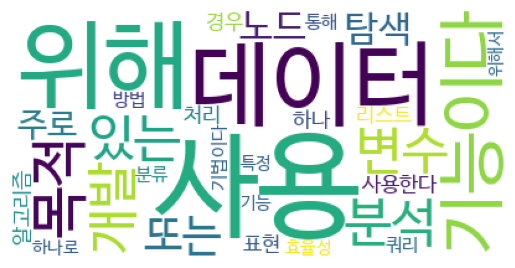

In [36]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')
plt.show()